# Modelos de regresión en SKlearn
## 1. Objetivo

Familiarizarse con los conceptos de modelos de tipo Decision Tree y Random Forest.

## Datos de Melb Houses
* Suburb: Suburb
* Address: Address
* Rooms: Number of rooms
* Price: Price in Australian dollars
* Method:
  * S - property sold;
  * SP - property sold prior;
  * PI - property passed in;
  * PN - sold prior not disclosed;
  * SN - sold not disclosed;
  * NB - no bid;
  * VB - vendor bid;
  * W - withdrawn prior to auction;
  * SA - sold after auction;
  * SS - sold after auction price not disclosed.
  * N/A - price or highest bid not available.

* Type:
  * br - bedroom(s);
  * h - house,cottage,villa, semi,terrace;
  * u - unit, duplex;
  * t - townhouse;
  * dev site - development site;
  * res - other residential.

* SellerG: Real Estate Agent

* Date: Date sold

* Distance: Distance from CBD in Kilometres
* Regionname: General Region (West, North West, North, North east …etc)
* Propertycount: Number of properties that exist in the suburb.
* Bedroom2 : Scraped # of Bedrooms (from different source)
* Bathroom: Number of Bathrooms
* Car: Number of carspots
* Landsize: Land Size in Metres
* BuildingArea: Building Size in Metres
* YearBuilt: Year the house was built
* CouncilArea: Governing council for the area
* Lattitude: Self explanitory
* Longtitude: Self explanitory


* Melb Data: https://www.kaggle.com/code/dansbecker/handling-missing-values/data?select=melb_data.csv
* Sklearn Cheat Sheet from Datacamp: https://media.datacamp.com/legacy/image/upload/v1676302389/Marketing/Blog/Scikit-Learn_Cheat_Sheet.pdf
* Decision Tree for regression: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* Random Forest for regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## 2. Librerias de trabajo

In [4]:
# Instala libreria Pandas si no la tenemos
#pip install pandas seaborn scikit-learn -y

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet
)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    LabelBinarizer,
    OneHotEncoder
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos

Primero nos encargaremos de leer los datos, indicando a Python donde se encuentra la carpeta que contiene los datos y los nombres de los archivos relevantes para el análisis.

In [6]:
#  Indicamos la ruta a la carpeta de de tu computadora 
# donde se ubican los datos del E-commerce
# Ejemplo: "C:\Usuarios\[tu nombre]\Descargas"

DATA_PATH="../data"

Ahora procederemos a definir una variable que indique el nombre del archivo junto con su extensión (por ejemplo, `.csv`):

In [7]:
FILE_DATA_PATH = "melb_data.csv"

Echaremos mano de la utilidad `os.path.join` de Python que indicar rutas en tu computadora donde se ubican archivos, así Pandas encontrá los archivos de datos.


**Ejemplo**

A continuación mostraremos un ejemplo leyendo el archivo `melb_data.csv`:

In [8]:
# Ejemplo
print(f"Ruta del archivo: {FILE_DATA_PATH}")
print(os.path.join(DATA_PATH, FILE_DATA_PATH))

Ruta del archivo: melb_data.csv
../data/melb_data.csv


In [9]:
# Leemos con pandas
df = pd.read_csv(
    os.path.join(DATA_PATH, FILE_DATA_PATH)
    )

In [10]:
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11356,Ferntree Gully,5 Bruce Cr,4,h,748888,S,Ray,15/07/17,24.8,3156,...,2,4.0,1014,280.0,1960.0,Knox,-37.88189,145.29148,Eastern Metropolitan,10788
9632,Mitcham,16 Burnett St,4,h,1302000,S,Noel,17/06/17,17.2,3132,...,1,1.0,842,160.0,1950.0,Whitehorse,-37.81235,145.19756,Eastern Metropolitan,6871
6636,Yarraville,76 Bishop St,4,h,1235000,SP,Jas,04/03/17,7.0,3013,...,2,2.0,244,206.0,2011.0,Maribyrnong,-37.81390,144.87410,Western Metropolitan,6543
9920,Heidelberg,3/186 Hawdon St,3,t,781000,S,Miles,24/06/17,8.9,3084,...,2,2.0,137,NaN,2000.0,Banyule,-37.74888,145.06593,Eastern Metropolitan,2890
11450,Murrumbeena,9/14 Wahroongaa Cr,3,t,956000,S,Woodards,15/07/17,10.1,3163,...,2,1.0,137,137.0,1994.0,Glen Eira,-37.88700,145.07303,Southern Metropolitan,4442
434,Ashwood,14 Ashwood Dr,3,h,1305000,S,Jellis,25/02/17,12.2,3147,...,1,1.0,760,120.0,1960.0,Monash,-37.85800,145.10380,Southern Metropolitan,2894
5192,Reservoir,129 Spring St,2,h,623500,S,Nelson,22/08/16,11.2,3073,...,1,0.0,452,NaN,NaN,Darebin,-37.72710,145.00090,Northern Metropolitan,21650
8090,Mont Albert,47 View St,3,h,1587000,S,Marshall,20/05/17,11.8,3127,...,2,2.0,624,NaN,NaN,Whitehorse,-37.82030,145.11050,Eastern Metropolitan,2079
4304,Niddrie,87 Hotham Rd,2,h,657000,S,Barry,12/11/16,11.2,3042,...,2,1.0,268,104.0,1950.0,Moonee Valley,-37.73430,144.87830,Western Metropolitan,2291
3018,Hampton,3 Kendall St,4,h,1600000,VB,Marshall,03/12/16,13.7,3188,...,2,2.0,607,242.0,2011.0,Bayside,-37.93240,145.02350,Southern Metropolitan,5454


Revisemo las información de los datos:

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  str    
 1   Address        13580 non-null  str    
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  str    
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  str    
 6   SellerG        13580 non-null  str    
 7   Date           13580 non-null  str    
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  str    
 17  Lattitude      13580 non-null  float64
 18  Longtitude     13

# 2 Árboles de Decisión y Bosques Aleatorios para Modelos de Regresión

## 2.1. Árboles de Decisión para Regresión

Un **árbol de decisión** es un modelo que divide los datos en subconjuntos más pequeños a través de **reglas de decisión** basadas en las características de entrada (features). En cada división o **nodo**, el modelo busca **la mejor manera de separar los datos** para minimizar el error de predicción.

### Idea general

A diferencia de los árboles para clasificación (que predicen etiquetas), los **árboles de regresión** predicen **valores numéricos continuos**.

El modelo intenta encontrar **umbrales (thresholds)** en las variables de entrada que dividan los datos de forma que **la varianza del valor objetivo se reduzca al máximo** en los subconjuntos.

### Proceso de construcción

1. **Partición inicial:**  
   Se comienza con todos los datos en un único nodo (raíz).

2. **Selección del mejor split:**  
   Para cada característica $ X_j $ y posible punto de corte $ s $, se evalúa una función de pérdida, normalmente el **Error Cuadrático Medio (MSE)**:

   $$
   \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y})^2
   $$

   donde:
   - $ y_i $ es el valor real,
   - $ \hat{y} $ es la predicción promedio del nodo.

   Se elige el split $ (X_j, s) $ que minimiza el MSE de las divisiones hijas.

3. **División recursiva:**  
   El proceso se repite para cada nodo hijo hasta cumplir un criterio de parada (por ejemplo, una profundidad máxima o un número mínimo de muestras por nodo).

4. **Predicción:**  
   La predicción final para un nuevo dato es el **promedio de los valores de entrenamiento** en la hoja donde termina dicho dato.

### Fórmula de predicción

Para un árbol de decisión con $ M $ regiones $ R_1, R_2, \dots, R_M $:

$$
\hat{f}(x) = \sum_{m=1}^{M} c_m \, \mathbf{1}_{\{x \in R_m\}}
$$

donde:
- $ c_m $ es el promedio de las observaciones $ y_i $ en la región $ R_m $,
- $ \mathbf{1}_{\{x \in R_m\}} $ es una función indicadora que vale 1 si $ x $ cae en la región $ R_m $.

---

## 2.2 Bosques Aleatorios (Random Forests)

Un **Random Forest** es un **ensamble de muchos árboles de decisión**.  
Su objetivo es **reducir la varianza** del modelo individual sin aumentar demasiado el sesgo.

### Idea general

Cada árbol en el bosque se entrena sobre una **muestra aleatoria** del conjunto de datos (con reemplazo, técnica conocida como *bootstrap*).  
Además, en cada división del árbol, **solo se considera un subconjunto aleatorio de las variables**.

Esto introduce **diversidad** entre los árboles, lo que hace que sus errores no estén correlacionados.

### Construcción de un Random Forest

1. **Bootstrap sampling:**  
   Para cada árbol $b \in \{1, \dots, B\}$:
   - Se toma una muestra aleatoria del dataset con reemplazo.
   - Se construye un árbol de decisión sobre esa muestra.

2. **Selección aleatoria de features:**  
   En cada nodo del árbol, se selecciona un subconjunto aleatorio de $k$ características $k < p$, donde $p$ es el número total de variables.  
   Solo entre esas $k$ se busca el mejor split.

3. **Promedio de predicciones:**  
   La predicción final se obtiene **promediando las predicciones de todos los árboles**:

   
   $$\hat{f}_{\text{RF}}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}_b(x)$$

   donde $\hat{f}_b(x)$ es la predicción del árbol $b$.

### Intuición del Random Forest

- Cada árbol tiene **alta varianza** (puede sobreajustar),  
  pero el promedio de muchos árboles **reduce esa varianza**.
- Como los árboles son **entrenados con diferentes muestras y subconjuntos de variables**, sus errores tienden a **cancelarse entre sí**.
- Resultado: un modelo **más estable** y **más preciso** que un solo árbol.

### Ventajas

* Robusto frente al sobreajuste (overfitting).  
* Maneja bien grandes cantidades de features.  
* Captura relaciones no lineales.  
* Permite medir la **importancia de las variables**.

### Desventajas

* Es más difícil de interpretar (pérdida de interpretabilidad frente a un solo árbol).  
* Mayor costo computacional.  



# 3. Modelos de regresión para predecir el precio de Melb Houses

In [12]:
# Define listas de columnas que van a emplearse en el modelado
num_features = [
    'Rooms', 
    'BuildingArea',
    'Landsize',
    'Distance',
    'Bathroom',
    'YearBuilt'
 ]

cat_cols = ['Regionname', 'Type']

# Lista que tiene todas los grupos de columnas
non_target_cols = num_features + cat_cols

target = ['Price']

In [13]:
df["BuildingArea"] = df["BuildingArea"].fillna(0)

In [14]:
df["YearBuilt"] = df["YearBuilt"].fillna(df["YearBuilt"].median())

In [15]:
df[non_target_cols].isna().sum()

Rooms           0
BuildingArea    0
Landsize        0
Distance        0
Bathroom        0
YearBuilt       0
Regionname      0
Type            0
dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df[non_target_cols],
    df[target],
    test_size=0.2,
)

In [17]:
# Pipeline para escalar con estandar z-score
numerical_pipe = Pipeline([
    ('standar_scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
dt = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=2,
    max_features=3
)

# Ajusta el modelo con los datos de prueba
dt.fit(X_train[num_features],y_train)

y_train_pred = dt.predict(X_train[num_features])
y_test_pred = dt.predict(X_test[num_features])

# error en conjunto de entrenamiento y prueba
error_train = root_mean_squared_error(y_train, y_train_pred)
error_test = root_mean_squared_error(y_test, y_test_pred)

# errores
print("Error RSME en train:", round(error_train,4) )
print("Error RSME en test:", round(error_test,4) )

Error RSME en train: 482342.4195
Error RSME en test: 486107.4237


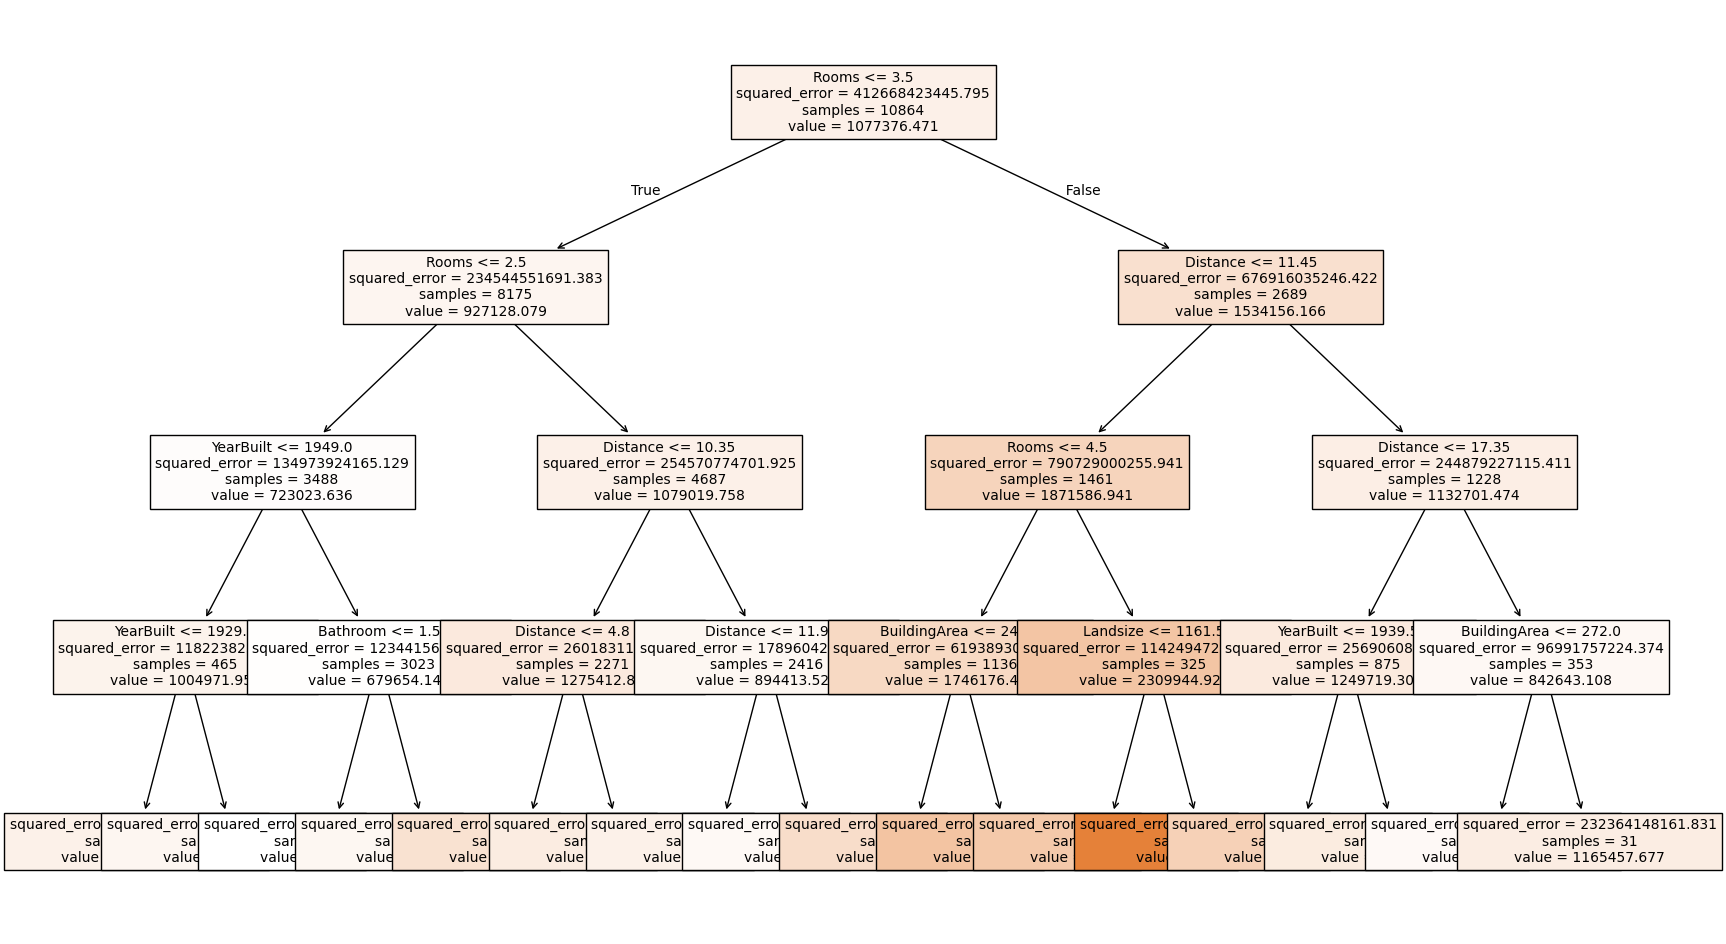

In [37]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,12))
_ = plot_tree(
    dt, 
    feature_names=num_features,
    filled=True,
fontsize=10)

In [16]:
models_regresion = { 
    'dt_1': DecisionTreeRegressor(max_depth=3, min_samples_split=5, max_features=4),
    'dt_2': DecisionTreeRegressor(max_depth=6, min_samples_split=2, max_features=4),
    'dt_3': DecisionTreeRegressor(max_depth=9, min_samples_split=5, max_features=4),
    'rf_4': RandomForestRegressor(n_estimators=50,max_depth=6, min_samples_split=5, max_features=4),
    'rf_5': RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_split=10, max_features=10),
    'rf_500': RandomForestRegressor(n_estimators=500,max_depth=10, min_samples_split=3, max_features=5),
    }

In [17]:
models = []
models_train_errors = []
models_test_errors = []

for model_name in models_regresion.keys():

    print("Modelo:", model_name)
    model = Pipeline([
        ('transform', pre_processor),
        ('model', models_regresion[model_name])
    ])

    # Ajusta el modelo con los datos de prueba
    model.fit(X_train[non_target_cols],y_train)

    y_train_pred = model.predict(X_train[non_target_cols])
    y_test_pred = model.predict(X_test[non_target_cols])

    # error en conjunto de entrenamiento y prueba
    error_train = root_mean_squared_error(y_train, y_train_pred)
    error_test = root_mean_squared_error(y_test, y_test_pred)

    # errores
    print("Error RSME en train:", round(error_train,4) )
    print("Error RSME en test:", round(error_test,4) )

    print("----------------------------------------------")

    models.append(model_name)
    models_train_errors.append(error_train)
    models_test_errors.append(error_test)

    

Modelo: dt_1
Error RSME en train: 527376.5519
Error RSME en test: 526191.4957
----------------------------------------------
Modelo: dt_2
Error RSME en train: 408253.8013
Error RSME en test: 411094.0996
----------------------------------------------
Modelo: dt_3
Error RSME en train: 352050.4056
Error RSME en test: 389033.5366
----------------------------------------------
Modelo: rf_4
Error RSME en train: 362199.7037
Error RSME en test: 364233.3986
----------------------------------------------
Modelo: rf_5
Error RSME en train: 336041.7086
Error RSME en test: 342985.9373
----------------------------------------------
Modelo: rf_500
Error RSME en train: 266041.2457
Error RSME en test: 311181.5011
----------------------------------------------


In [18]:
pd.DataFrame({
    "model": models,
    "rmse_train": models_train_errors,
    "rmse_test": models_test_errors,
}).sort_values(["rmse_test"])

,model,rmse_train,rmse_test
5,rf_500,266041.245718,311181.501142
4,rf_5,336041.708607,342985.937273
3,rf_4,362199.703716,364233.398561
2,dt_3,352050.405600,389033.536565
1,dt_2,408253.801319,411094.099608
0,dt_1,527376.551905,526191.495666


[Text(0.5, 0.875, 'x[8] <= 0.5\nsquared_error = 409529781900.342\nsamples = 10864\nvalue = 1073529.479'),
 Text(0.25, 0.625, 'x[0] <= 0.586\nsquared_error = 480152693362.149\nsamples = 7692\nvalue = 1146828.632'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= -0.105\nsquared_error = 276583646280.213\nsamples = 5538\nvalue = 964784.778'),
 Text(0.0625, 0.125, 'squared_error = 103336651172.382\nsamples = 1211\nvalue = 634538.517'),
 Text(0.1875, 0.125, 'squared_error = 286004367424.657\nsamples = 4327\nvalue = 1057210.99'),
 Text(0.375, 0.375, 'x[3] <= 0.197\nsquared_error = 699269336186.174\nsamples = 2154\nvalue = 1614868.961'),
 Text(0.3125, 0.125, 'squared_error = 829411745831.914\nsamples = 1087\nvalue = 2002903.445'),
 Text(0.4375, 0.125, 'squared_error = 257026135381.346\nsamples = 1067\nvalue = 1219561.103'),
 Text(0.75, 0.625, 'x[16] <= 0.5\nsquared_error = 193648260386.947\nsamples = 3172\nvalue = 895781.343'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[

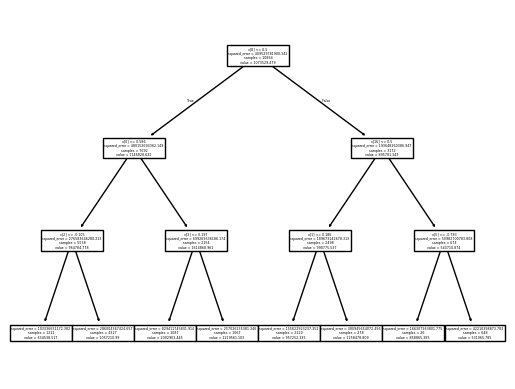

In [19]:
from sklearn import tree

tree.plot_tree(models_regresion["dt_1"])